In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pymap3d as pm

In [2]:
# Secondo giorno
bag = "2021-05-14-09-35-43"
lat0 = 43.71435 # deg
lon0 = 10.844789 # deg
h0   = 0.0     # meters

init = pm.geodetic2ned(43.71435, 10.844789, 0, lat0, lon0, h0)
anch_1 = pm.geodetic2ned(43.71435, 10.844789, 0, lat0, lon0, h0)
anch_2 = pm.geodetic2ned(43.7151108994, 10.8447301681, 0, lat0, lon0, h0)
anch_3 = pm.geodetic2ned(43.7150965137, 10.8447291539, 0, lat0, lon0, h0)
#anch_4 = pm.geodetic2ned(43.71435, 10.844789, 0, lat0, lon0, h0)

In [2]:
# Primo giorno
bag = "2021-05-03-16-17-31"
lat0 = 40.893483 # deg
lon0 = 12.969893  # deg
h0   = 0.0     # meters 
anch_1 = pm.geodetic2ned(40.89397, 12.97047, 0, lat0, lon0, h0)
anch_2 = pm.geodetic2ned(40.89381, 12.97025, 0, lat0, lon0, h0)
anch_3 = pm.geodetic2ned(40.89369, 12.97035, 0, lat0, lon0, h0)
anch_4 = pm.geodetic2ned(40.89381, 12.97082, 0, lat0, lon0, h0)

In [3]:
data_state = pd.read_csv("bagfiles/rec/state_"+bag+".csv")

In [5]:
data_gps = pd.read_csv("bagfiles/rec/gps_"+bag+".csv")

In [6]:
data_range = pd.read_csv("bagfiles/rec/range_"+bag+".csv")

In [9]:
x = []
y = []

state_num = data_state[ ["field.position.latitude", "field.position.longitude", "field.position.altitude"] ].to_numpy()
for state in state_num:
    n, e, d = pm.geodetic2ned(state[0], state[1], 0, lat0, lon0, h0)
    x.append(e)
    y.append(n)
x = np.array(x)
y = np.array(y)

In [10]:
xt = []
yt = []

state_num = data_gps[ ["field.latitude", "field.longitude", "field.altitude"] ].to_numpy()
for gps in state_num:
    n, e, d = pm.geodetic2ned(gps[0], gps[1], 0, lat0, lon0, h0)
    xt.append(e)
    yt.append(n)
xt = np.array(xt)
yt = np.array(yt)

In [11]:
t_gps       = np.array(data_gps["%time"])
t_ran       = np.array(data_range["%time"])
t_st        = np.array(data_state["%time"])

idx = []
for t_i in t_gps:
    idx.append(np.abs(t_st-t_i).argmin())
idx_ran = []
for t_i in t_ran:
    idx_ran.append(np.abs(t_st-t_i).argmin())
idx = np.array(idx)
idx_ran = np.array(idx_ran)


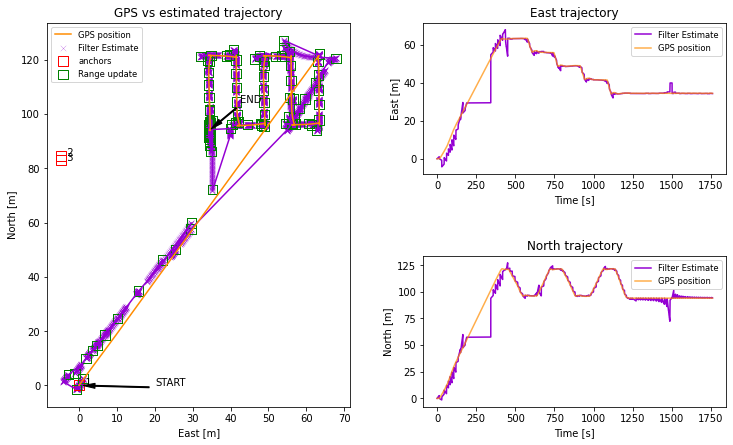

In [13]:
plt.cla()
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(4,4)

# LARGE SUBPLOT
plt.subplot2grid((4,4), (0,0), colspan=2, rowspan=4)
plt.title('GPS vs estimated trajectory')
plt.xlabel('East [m]')
plt.ylabel('North [m]')

# Filter Estimate
plt.plot(x,y, c='darkviolet')
plt.scatter(x,y, c='darkviolet', marker='x', s=30, linewidth=0.2, label="Filter Estimate")

# Gps
plt.plot(xt,yt, c="darkorange", linewidth=1.5, label="GPS position")

plt.annotate(text="START", xy=(xt[0], yt[0]), xytext=(xt[0]+20, yt[0]), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.annotate(text="END", xy=(xt[-1], yt[-1]), xytext=(xt[-1]+8, yt[-1]+10), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

# Anchors
plt.scatter([anch_1[1], anch_2[1], anch_3[1]], 
           [anch_1[0], anch_2[0], anch_3[0]], s=100, facecolors='none', marker='s', edgecolors='red', label='anchors')
plt.text(anch_1[1], anch_1[0], "  1")
plt.text(anch_2[1], anch_2[0], "  2")
plt.text(anch_3[1], anch_3[0], "  3")
#plt.text(anch_4[1], anch_4[0], "  4")

# Ranges
plt.scatter(x[idx_ran], y[idx_ran],facecolors='none', marker='s', s=90, edgecolors='green', label='Range update')
plt.legend(fontsize='small')

# TOP SMALL PLOT
t = (t_st - t_st[0])/10**(7)
plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=2)
plt.plot(t[idx], x[idx],  c='darkviolet', linewidth=1.5, label="Filter Estimate")
plt.plot(t[idx], xt, linewidth=1.5, c='darkorange', alpha=0.7, label='GPS position')
plt.legend(fontsize='small')
plt.title('East trajectory')
plt.ylabel('East [m]')
plt.xlabel('Time [s]')

#BOTTOM SMALL PLOT  
plt.subplot2grid((4,4), (2,2), colspan=2, rowspan=2)
plt.plot(t[idx], y[idx],  c='darkviolet', linewidth=1.5, label="Filter Estimate")
plt.plot(t[idx], yt, linewidth=1.5, c='darkorange', alpha=0.7, label='GPS position')
plt.title('North trajectory')
plt.ylabel('North [m]')
plt.xlabel('Time [s]')
plt.legend(fontsize='small')

fig.tight_layout(h_pad=0, w_pad=0)
fig.set_size_inches(w=11,h=7)
fig.savefig("plots/"+bag+"")
    
plt.show()